## AirBnb

In [99]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
from matplotlib import pyplot as plt

In [100]:
# Define Variables
roomPrice = 100
roomCount = 1
aviableDays = 30
occupanyRate = 0.6

cleaningFee = 50
unitBill = 5

#Fixed Cost
rent = 2500
maintainance = 500

In [101]:
roomPriceSlider = widgets.IntSlider(
    value = 100,
    min = 0,
    max = 500,
    step = 1,
    description = 'Room Price: ',
    disabled = False,
    continous_update = True,
    orientiation = 'horizontal',
    readout = True,
    readout_format = 'd')
display(roomPriceSlider)

roomCountSlider = widgets.IntSlider(
    value = 2,
    min = 0,
    max = 50,
    step = 1,
    description = 'Room Count: ',
    disabled = False,
    continous_update = True,
    orientiation = 'horizontal',
    readout = True,
    readout_format = 'd')
display(roomCountSlider)

availableDaysSlider = widgets.IntSlider(
    value = 28,
    min = 0,
    max = 30,
    step = 1,
    description = 'Available Days: ',
    disabled = False,
    continous_update = True,
    orientiation = 'horizontal',
    readout = True,
    readout_format = 'd')
display(availableDaysSlider)

occupanyRateSlider = widgets.FloatSlider(
    value = 0.1,
    min = 0,
    max = 1.0,
    step = 1,
    description = 'Occupany Rate: ',
    disabled = False,
    continous_update = True,
    orientiation = 'horizontal',
    readout = True,
    readout_format = '.2f')
display(occupanyRateSlider)


IntSlider(value=100, description='Room Price: ', max=500)

IntSlider(value=2, description='Room Count: ', max=50)

IntSlider(value=28, description='Available Days: ', max=30)

FloatSlider(value=0.1, description='Occupany Rate: ', max=1.0, step=1.0)

In [113]:
roomPrice = roomPriceSlider.value
roomCount = roomCountSlider.value
availableDays = availableDaysSlider.value
occupanyRate = occupanyRateSlider.value

In [114]:
def calculateRevenue (roomPrice, roomCount, aviableDays, occupanyRate):
    revenue = roomPrice * roomCount * aviableDays * occupanyRate
    return revenue
    
def calculateVariableCost (roomCount, aviableDays, occupanyRate, cleaningFee, unitBill):
    variableCost = roomCount * aviableDays * occupanyRate *  (cleaningFee + unitBill)
    return variableCost
    
def calculateFixedCost (rent, maintainance):
    return rent + maintainance

def calculateProfit (rev, varCost, fCost):
    return rev - varCost - fCost

def calculateBreakEvenPoint (rev, varCost, fCost):
    return fCost/(rev - varCost) #fixed cost/(unit revenue - unit variable cost) & ours is calculated based on 1 month

def report(rev, varCost, fCost, profit, breakEven):
    format_breakEven = "{:.2f}".format(breakEven)
    
    print(f"Revenue: {rev} tl")
    print(f"Variable cost: {varCost} tl")
    print(f"Fixed Cost: {fCost} tl")
    print(f"Profit: {profit} tl")
    print(f"BreakEven Point: {format_breakEven} months")
    
def unitIncome(roomPrice, roomCount, occupanyRate):
    income = roomPrice * roomCount * occupanyRate
    return income

def unitCost(roomCount, occupanyRate, cleaningFee, unitBill):
    unitCost = roomCount * occupanyRate *  (cleaningFee + unitBill)
    return unitCost
    
def breakEvenGraph(unitIncome, unitCost, fCost):
    plt.figure(figsize = (15,6))
    
    dailyCost= [(fCost)]
    for day in range(1,30):
        dailyCost.append(dailyCost[day-1] + unitCost)
        
    dailyIncome = [0]
    for day in range(1,30):
        dailyIncome.append(dailyIncome[day-1] + unitIncome)
    
    plt.plot(dailyCost)
    plt.plot(dailyIncome)
    
    plt.title("AirBnb BreakEven Graph")
    plt.xlabel("days")
    plt.ylabel("dollar")
    
    plt.show()

def main():
    rev = calculateRevenue(roomPrice, roomCount, aviableDays, occupanyRate)
    varCost = calculateVariableCost (roomCount, aviableDays, occupanyRate, cleaningFee, unitBill)
    fCost = calculateFixedCost (rent, maintainance)
    profit = calculateProfit (rev, varCost, fCost)
    breakEven = calculateBreakEvenPoint (rev, varCost, fCost)
    report(rev, varCost, fCost, profit, breakEven)
    unitIn = unitIncome(roomPrice, roomCount, occupanyRate)
    unitC = unitCost(roomCount, occupanyRate, cleaningFee, unitBill)
    breakEvenGraph(unitIn, unitC, fCost)


Revenue: 7458.0 tl
Variable cost: 1815.0 tl
Fixed Cost: 3000 tl
Profit: 2643.0 tl
BreakEven Point: 0.53 months


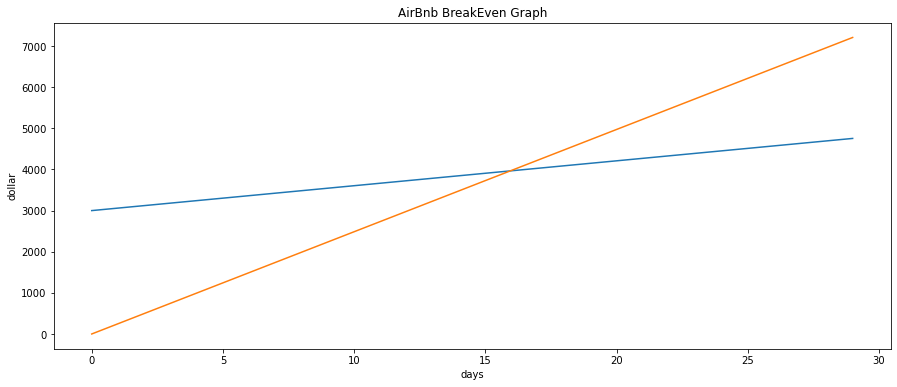

In [115]:
main()